# Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score
from joblib import dump, load
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import image_lib as imlib
import cv2

# SVM Classifier

In [3]:
def svmClassification(df, pretrainedModel, prediction, testSize, crossval, getPlot): 
    # Assigning data
    X = df.drop(['label'], axis=1)  
    y = df['label']
    
    # Normalising
    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X)
    
    # Splitting the dataset.
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = testSize, random_state=10)
    
    print('[UPDATE] Data has been loaded successfully!')
    
    if pretrainedModel == 'yes':
        print('[UPDATE] Using pretrained model!')
        svclassifier = load('PIPE3_SVM_LINEAR100.joblib')
        print('[UPDATE] Pretrained model loaded!')
    else:
        print('[UPDATE] SVM training initiated...')
        
        # Identification of hyperparameters
        #param_grid = [
        #    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
        #    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['poly']},
        #    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']},
        #    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
        #]
        
        # The parameters used
        param_grid = [
            {'C': [100], 'kernel': ['linear']},
        ]
        # Calling the Support Vector Classifier function
        svc = svm.SVC()

        # Discovering the optimum in the parameter grid
        print('[UPDATE] GridSearch initiated....')
        svclassifier = GridSearchCV(svc, param_grid, verbose = 2)

        # Training the model using the discovered SVC function
        print('[UPDATE] Training model....')
        svclassifier.fit(X_train, y_train)
        print('[UPDATE] Best hyperparameters found in gridsearch: ', svclassifier.best_params_)
        
        # Saving the trained classifier
        dump(svclassifier, 'PIPE1_SVM_LINEAR100.joblib') 
        print('[UPDATE] Model has been saved!')
        
    if crossval == 'yes': # Cross Validated Accuracy
        print('[UPDATE] Cross-validating accuracy...')
        scores = cross_val_score(svclassifier, X_norm, y, cv=StratifiedKFold(10))
        print('------------- Cross validated accuracy ---------------')
        print(scores)
        print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
        print(' ')
    
    
    if prediction == 'yes': # Performance Metrics
        y_pred = svclassifier.predict(X_norm)
        print('[UPDATE] Performance metrics requested!')
        print('------------------ Confusion Matrix -------------------')
        print(confusion_matrix(y,y_pred))
        print(' ')
        print('---------------- Classification report ----------------')
        print(classification_report(y,y_pred))
        print(' ')
        print('--------------------- AUC score -----------------------')
        print(roc_auc_score(y, y_pred))
        print(' ')
        print('------------------- Accuracy score --------------------')
        print(accuracy_score(y, y_pred))
        
        

# Load images, feature extraction, and call SVM classifier
This code block is what was used to test the the SVM classifier.

(Import packages and SVM classifier function before running this)

In [4]:
# pip 1, 2, 4, 5
# Example
augmentation_type = 'salt003'
pipeline = imlib.pip4
directory ='Saltnpepper/' + augmentation_type
path = "/home/sofus/deep/data/Augmented/"

pos = [cv2.cvtColor(cv2.imread(path + directory + "/Positive/{}_1.jpg".format(i)), cv2.COLOR_BGR2GRAY) for i in range(10502, 14501)]
neg = [cv2.cvtColor(cv2.imread(path + directory + "/Negative/{}.jpg".format(i)), cv2.COLOR_BGR2GRAY)  for i in range(10502, 14501)]

out_p = [pipeline(img) for img in pos]
out_n = [pipeline(img) for img in neg]

feat_pos = [imlib.feature_extraction(img, out_p[i]) for i, img in enumerate(pos)]
feat_neg = [imlib.feature_extraction(img, out_n[i]) for i, img in enumerate(neg)]

SAMPLE_SIZE = len(feat_pos)
print('SAMPLESIZE:', len(feat_pos))

# Generating the features
int_mean_p = [feat_pos[i][0] for i in range(len(feat_pos))]
int_mean_n = [feat_neg[i][0] for i in range(len(feat_neg))]
int_mean = np.concatenate((int_mean_p, int_mean_n))

int_stdev_p = [feat_pos[i][1] for i in range(len(feat_pos))]
int_stdev_n = [feat_neg[i][1] for i in range(len(feat_neg))]
int_stdev = np.concatenate((int_stdev_p, int_stdev_n))

ratio_p = [feat_pos[i][2] for i in range(len(feat_pos))]
ratio_n = [feat_neg[i][2] for i in range(len(feat_neg))]
ratio = np.concatenate((ratio_p, ratio_n))

grad_mean_p = [feat_pos[i][3] for i in range(len(feat_pos))]
grad_mean_n = [feat_neg[i][3] for i in range(len(feat_neg))]
grad_mean = np.concatenate((grad_mean_p, grad_mean_n))

grad_mag_p = [feat_pos[i][4] for i in range(len(feat_pos))]
grad_mag_n = [feat_neg[i][4] for i in range(len(feat_neg))]
grad_mag = np.concatenate((grad_mag_p, grad_mag_n))

grad_angle_p = [feat_pos[i][5] for i in range(len(feat_pos))]
grad_angle_n = [feat_neg[i][5] for i in range(len(feat_neg))]
grad_angle = np.concatenate((grad_angle_p, grad_angle_n))

grad_max_p = [feat_pos[i][6] for i in range(len(feat_pos))]
grad_max_n = [feat_neg[i][6] for i in range(len(feat_neg))]
grad_max = np.concatenate((grad_max_p, grad_max_n))

grad_mag_mean_p = [feat_pos[i][7] for i in range(len(feat_pos))]
grad_mag_mean_n = [feat_neg[i][7] for i in range(len(feat_neg))]
grad_mag_mean = np.concatenate((grad_mag_mean_p, grad_mag_mean_n))

grad_stand_p = [feat_pos[i][8] for i in range(len(feat_pos))]
grad_stand_n = [feat_neg[i][8] for i in range(len(feat_neg))]
grad_stand = np.concatenate((grad_stand_p, grad_stand_n))

mean_int_p = [feat_pos[i][9] for i in range(len(feat_pos))]
mean_int_n = [feat_neg[i][9] for i in range(len(feat_neg))]
mean_int = np.concatenate((mean_int_p, mean_int_n))

stdev_mean_p = [feat_pos[i][10] for i in range(len(feat_pos))]
stdev_mean_n = [feat_neg[i][10] for i in range(len(feat_neg))]
stdev_mean = np.concatenate((stdev_mean_p, stdev_mean_n))

# Generating corresponding labels
label_neg = np.array(np.zeros(SAMPLE_SIZE, dtype = int))
label_pos = np.array(np.ones(SAMPLE_SIZE, dtype = int))
labels = np.concatenate((label_pos, label_neg),0)


# Create dataframe
df = pd.DataFrame(np.column_stack([int_mean, int_stdev, ratio, grad_mean, grad_mag, grad_angle, grad_max, 
                                   grad_mag_mean, grad_stand, mean_int, stdev_mean, labels]),  
                  
                  
                  
                  columns=['Local IntensMean', 'Local IntensStDev', 'Ratio', 'GradMean', 
                           'Unique Grad Mag', 'Unique Grad Angle', 'Grad Max', 'Grad Mag Mean', 'Grad Stand',
                           'Global intensMean', 'Global Intens Stand', 'label'])
df.fillna(0, inplace=True)


df.to_csv('aug_pipeline1_' + augmentation_type + '.csv')
print('[UPDATE] Augmentations has been saved!')

# Running the SVM classifier
svmClassification(df, pretrainedModel = 'yes', prediction = 'yes', testSize = 0.2051, crossval = 'no', getPlot = 'no')
print('----------------- Augmentation type -------------------')
print(augmentation_type)

SAMPLESIZE: 3999
[UPDATE] Augmentations has been saved!
[UPDATE] Data has been loaded successfully!
[UPDATE] Using pretrained model!
[UPDATE] Pretrained model loaded!
[UPDATE] Performance metrics requested!
------------------ Confusion Matrix -------------------
[[3989   10]
 [  42 3957]]
 
---------------- Classification report ----------------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3999
         1.0       1.00      0.99      0.99      3999

   micro avg       0.99      0.99      0.99      7998
   macro avg       0.99      0.99      0.99      7998
weighted avg       0.99      0.99      0.99      7998

 
--------------------- AUC score -----------------------
0.9934983745936484
 
------------------- Accuracy score --------------------
0.9934983745936484
----------------- Augmentation type -------------------
salt003


/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVC from version 0.20.3 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator SVC from version 0.20.3 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.20.3 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Classification using PCA
This code block was used to test the viablity of using dimensionality reduction on the features.

In [8]:
from sklearn.decomposition import PCA
testSize = 0.2051
# Assigning data
X = df.drop(['label'], axis=1)  
y = df['label']

# Normalising
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X_norm)
print('[UPDATE] PCA complete!')

# Splitting the dataset.
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size = testSize, random_state=10)


print('[UPDATE] Data has been loaded successfully!')

param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
]
# Calling the Support Vector Classifier function
svc = svm.SVC()
#svc = svm.SVC(verbose=True)

# Discovering the optimum in the parameter grid
print('[UPDATE] GridSearch initiated....')
svclassifier = GridSearchCV(svc, param_grid, cv=StratifiedKFold(3))

# Training the model using the discovered SVC function with the discovered parameters
print('[UPDATE] Training model....')
svclassifier.fit(X_train, y_train)
print('[UPDATE] Best hyperparameters found in gridsearch: ', svclassifier.best_params_)

# RESULTS

print('[UPDATE] Cross-validating accuracy...')

# !!! COMMENT CROSS_VAL_SCORE FOR FASTER COMPUTATION !!!
scores = cross_val_score(svclassifier, X_norm, y, cv=StratifiedKFold(3))
print('------------- Cross validated accuracy ---------------')
print(scores)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
print(' ')

y_pred = svclassifier.predict(X_test)
print('[UPDATE] Performance metrics requested!')
print('------------------ Confusion Matrix -------------------')
print(confusion_matrix(y_test,y_pred))
print(' ')
print('---------------- Classification report ----------------')
print(classification_report(y_test,y_pred))
print(' ')
print('--------------------- AUC score -----------------------')
print(roc_auc_score(y_test, y_pred))
print(' ')
print('------------------- Accuracy score --------------------')
print(accuracy_score(y_test, y_pred))


#dump(svclassifier, 'PIPE1_SVM_PCA4C.joblib')

[UPDATE] PCA complete!
[UPDATE] Data has been loaded successfully!
[UPDATE] GridSearch initiated....
[UPDATE] Training model....
[UPDATE] Best hyperparameters found in gridsearch:  {'C': 10, 'kernel': 'linear'}
[UPDATE] Cross-validating accuracy...
------------- Cross validated accuracy ---------------
[0.99474869 0.99212303 0.9939985 ]
Accuracy: 0.99362 (+/- 0.00221)
 
[UPDATE] Performance metrics requested!
------------------ Confusion Matrix -------------------
[[788   2]
 [  9 842]]
 
---------------- Classification report ----------------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       790
         1.0       1.00      0.99      0.99       851

   micro avg       0.99      0.99      0.99      1641
   macro avg       0.99      0.99      0.99      1641
weighted avg       0.99      0.99      0.99      1641

 
--------------------- AUC score -----------------------
0.9934462806229454
 
------------------- Accuracy score ---------

# Plotting PCA
Used for visualisation of the principle compoents

[UPDATE] Data has been loaded successfully!


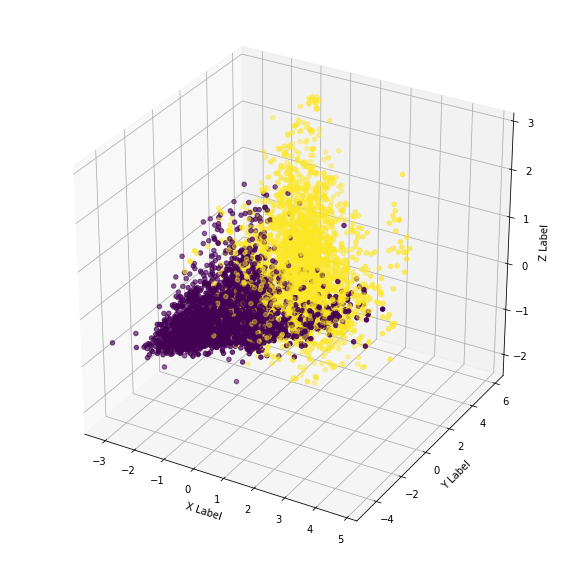

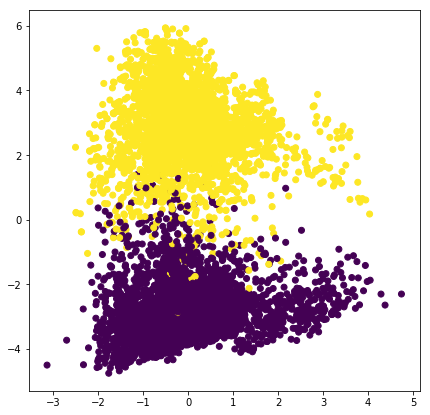

In [3]:
from sklearn.decomposition import PCA
# Assigning data
X = df.drop(['label'], axis=1)  
y = df['label']

# Normalising
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Splitting the dataset.
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2051, random_state=10)
    
print('[UPDATE] Data has been loaded successfully!')

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train)
x=principalComponents[:,1]
y=principalComponents[:,0]
z=principalComponents[:,2]

#plt.scatter(x,y,z, c=y_train, cmap=plt.cm.bwr)
#print(principalComponents.shape)
#type(principalComponents)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c=y_train, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train)
x=principalComponents[:,1]
y=principalComponents[:,0]
z=principalComponents[:,2]
plt.figure(figsize = (7,7))
plt.scatter(x,y, c=y_train)
plt.show()

# Recursive Feature Elimination and Cross Validation
Exploring the possiblity of using RFECV for feature elimination (Not included in the report)

In [7]:
from sklearn.feature_selection import RFECV
X = df.drop(['label'], axis=1)  
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2051, random_state=10)

svc = svm.SVC(C=0.01, gamma=0.001, kernel = 'linear')
#svclassifier = load('PIPE1_SVM_1.joblib')
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_, rfecv.estimator_)

# RESULTS
y_pred = rfecv.predict(X_test)
print('[UPDATE] Performance metrics requested!')
print('------------------ Confusion Matrix -------------------')
print(confusion_matrix(y_test,y_pred))
print(' ')
print('---------------- Classification report ----------------')
print(classification_report(y_test,y_pred))
print(' ')
print('--------------------- AUC score -----------------------')
print(roc_auc_score(y_test, y_pred))
print(' ')
print('------------------- Accuracy score --------------------')
print(accuracy_score(y_test, y_pred))

Optimal number of features : 7 SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[UPDATE] Performance metrics requested!
------------------ Confusion Matrix -------------------
[[787   3]
 [  6 845]]
 
---------------- Classification report ----------------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       790
         1.0       1.00      0.99      0.99       851

   micro avg       0.99      0.99      0.99      1641
   macro avg       0.99      0.99      0.99      1641
weighted avg       0.99      0.99      0.99      1641

 
--------------------- AUC score -----------------------
0.9945760014279552
 
------------------- Accuracy score --------------------
0.9945155393053017


# Feature Importance Testing
This was used to investigate the feature importance (Not included in the report)

In [4]:
print('[UPDATE] Feature importance')
#df = pd.read_csv ('/Users/jonasvejlgardkristensen/Documents/Datasets/FeatureData/pip1_train.csv')
#df.fillna(0, inplace=True)
print('[UPDATE] The size of data loaded:', df.shape)
# FOR TESTING:
#from sklearn.utils import shuffle
#df = shuffle(df)
#df = df.iloc[1:5000, :]
X = df.drop(['label'], axis=1)  
y = df['label']
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

svm = svm.SVC(kernel='linear', C = 100)
svm.fit(X_norm, y)
feature_names = df.columns[1:-1]

feature_importance = [[feature_names],[svm.coef_]]
print(feature_importance)

#plt.bar(feature_names, svm.coef_)


[UPDATE] Feature importance
[UPDATE] The size of data loaded: (7998, 12)
[[Index(['Local IntensStDev', 'Ratio', 'GradMean', 'Unique Grad Mag',
       'Unique Grad Angle', 'Grad Max', 'Grad Mag Mean', 'Grad Stand',
       'Global intensMean', 'Global Intens Stand'],
      dtype='object')], [array([[ 1.85390882,  2.00381968, -2.32863533, -1.03787643, -0.28239412,
        -3.31256587, -0.08603463, -1.90806097,  8.96280588, -1.22192793,
        -0.58366432]])]]


# Correlation Testing
Explorative investigation of the correlations between the features (not included in the report).

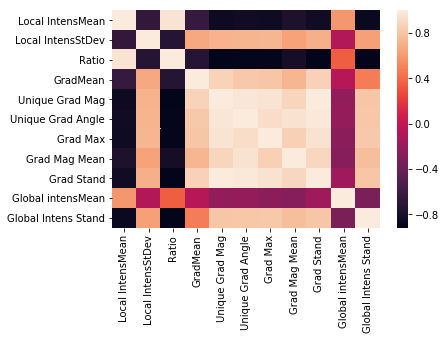

In [6]:
# ----------- CORRELATION TESTING --------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(['label'], axis=1) 
# load the R package ISLR
#infert = com.importr("ISLR")

# calculate the correlation matrix
corr = X.corr()

# plot heat map
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()
